# 9.1 Maximum Likelihood Estimation (MLE)

## The Core Idea

**Maximum Likelihood Estimation**: Find the parameter value that **maximizes the probability** of observing the data we actually observed.

## The Likelihood Function

### Definition

Given data \(x_1, x_2, \ldots, x_n\) and a model with parameter θ, the **likelihood function** is:

$$
L(\theta \mid x_1, \ldots, x_n) = P(x_1, \ldots, x_n \mid \theta)
$$

### For Independent Data

If observations are **independent and identically distributed (i.i.d.)**:

$$
L(\theta) = \prod_{i=1}^{n} f(x_i \mid \theta)
$$

where \(f(x \mid \theta)\) is the probability (PMF) or density (PDF).

### Log-Likelihood

In practice, we work with **log-likelihood** (easier to maximize):

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^{n} \log f(x_i \mid \theta)
$$

## The MLE

**Maximum Likelihood Estimate** \(\hat{\theta}_{\text{MLE}}\) is the value that maximizes \(L(\theta)\) or \(\ell(\theta)\):

$$
\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} \ell(\theta)
$$

### Finding the MLE

1. Write down the likelihood \(L(\theta)\)
2. Take the log: \(\ell(\theta) = \log L(\theta)\)
3. Take the derivative: \(\frac{d\ell}{d\theta}\)
4. Set equal to zero and solve: \(\frac{d\ell}{d\theta} = 0\)
5. Verify it's a maximum (check second derivative < 0)

## Example 1: Bernoulli Distribution

### Problem

Flip a coin n times, observe k heads. Estimate p (probability of heads).

### Solution

**Model**: Each flip \(X_i \sim \text{Bernoulli}(p)\)

**Likelihood**:
$$
L(p) = \prod_{i=1}^{n} p^{x_i}(1-p)^{1-x_i} = p^k(1-p)^{n-k}
$$

where k = number of heads.

**Log-likelihood**:
$$
\ell(p) = k\log p + (n-k)\log(1-p)
$$

**Derivative**:
$$
\frac{d\ell}{dp} = \frac{k}{p} - \frac{n-k}{1-p}
$$

**Set to zero**:
$$
\frac{k}{p} = \frac{n-k}{1-p} \implies k(1-p) = p(n-k) \implies k = np
$$

**MLE**:
$$
\hat{p}_{\text{MLE}} = \frac{k}{n}
$$

The MLE is just the sample proportion!

### Python Implementation

Bernoulli MLE Example
True p: 0.6
Sample: 100 flips, 63 heads

MLE estimate: p̂ = 0.630



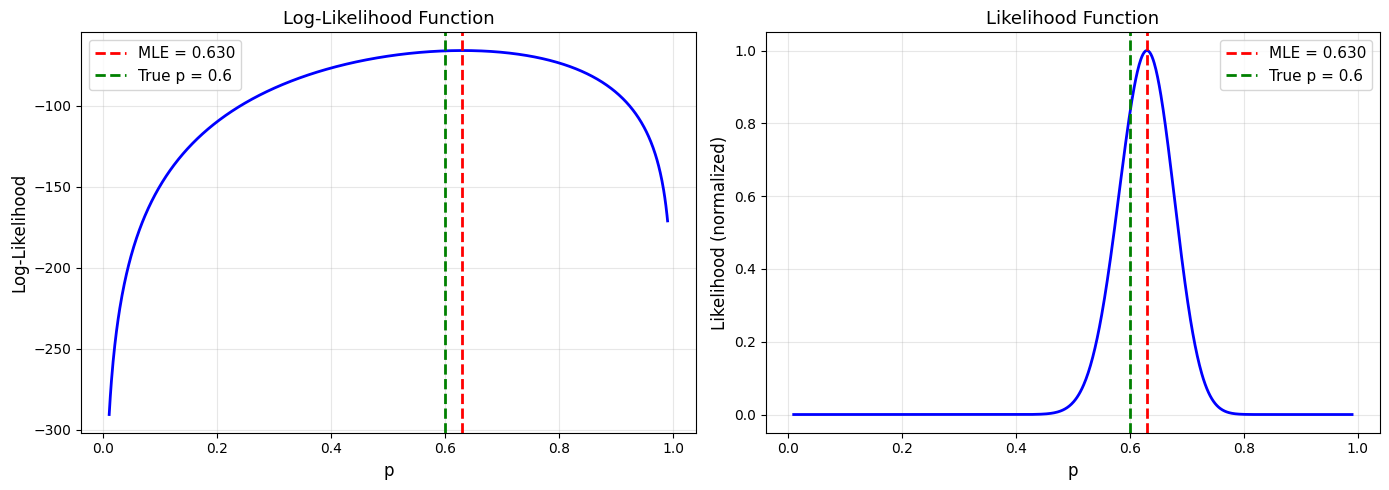

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize_scalar

np.random.seed(42)

# Generate data: 100 flips with true p = 0.6
true_p = 0.6
n = 100
flips = np.random.binomial(1, true_p, n)
k = np.sum(flips)

print("Bernoulli MLE Example")
print("="*70)
print(f"True p: {true_p}")
print(f"Sample: {n} flips, {k} heads")
print()

# MLE
p_mle = k / n
print(f"MLE estimate: p̂ = {p_mle:.3f}")
print()

# Log-likelihood function
def log_likelihood_bernoulli(p, data):
    k = np.sum(data)
    n = len(data)
    if p <= 0 or p >= 1:
        return -np.inf
    return k * np.log(p) + (n - k) * np.log(1 - p)

# Plot likelihood function
p_values = np.linspace(0.01, 0.99, 1000)
log_likes = [log_likelihood_bernoulli(p, flips) for p in p_values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Log-likelihood
ax1.plot(p_values, log_likes, 'b-', linewidth=2)
ax1.axvline(p_mle, color='red', linestyle='--', linewidth=2,
            label=f'MLE = {p_mle:.3f}')
ax1.axvline(true_p, color='green', linestyle='--', linewidth=2,
            label=f'True p = {true_p}')
ax1.set_xlabel('p', fontsize=12)
ax1.set_ylabel('Log-Likelihood', fontsize=12)
ax1.set_title('Log-Likelihood Function', fontsize=13)
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# Likelihood (not log)
likes = np.exp(log_likes - np.max(log_likes))  # Normalize for plotting
ax2.plot(p_values, likes, 'b-', linewidth=2)
ax2.axvline(p_mle, color='red', linestyle='--', linewidth=2,
            label=f'MLE = {p_mle:.3f}')
ax2.axvline(true_p, color='green', linestyle='--', linewidth=2,
            label=f'True p = {true_p}')
ax2.set_xlabel('p', fontsize=12)
ax2.set_ylabel('Likelihood (normalized)', fontsize=12)
ax2.set_title('Likelihood Function', fontsize=13)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('bernoulli_mle.png', dpi=150, bbox_inches='tight')
plt.show()


## Example 2: Normal Distribution

### Problem

Observe \(x_1, \ldots, x_n \sim N(\mu, \sigma^2)\). Estimate μ and σ².

### Solution

**PDF**:
$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

**Log-likelihood**:
$$
\ell(\mu, \sigma^2) = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2
$$

**Derivative w.r.t. μ**:
$$
\frac{\partial\ell}{\partial\mu} = \frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i - \mu) = 0
$$

**MLE for μ**:
$$
\hat{\mu}_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^{n}x_i = \bar{x}
$$

**Derivative w.r.t. σ²**:
$$
\frac{\partial\ell}{\partial\sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n}(x_i - \mu)^2 = 0
$$

**MLE for σ²**:
$$
\hat{\sigma}^2_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$

Note: This uses \(n\) in denominator, not \(n-1\) (slightly biased for small n).

### Python Implementation

Normal Distribution MLE
True μ: 10, True σ: 2
Sample size: 50

Analytical MLE:
  μ̂ = 9.549
  σ̂ = 1.849

Numerical MLE (verification):
  μ̂ = 9.549
  σ̂ = 1.849

Comparison with true values:
  μ: error = 0.451
  σ: error = 0.151


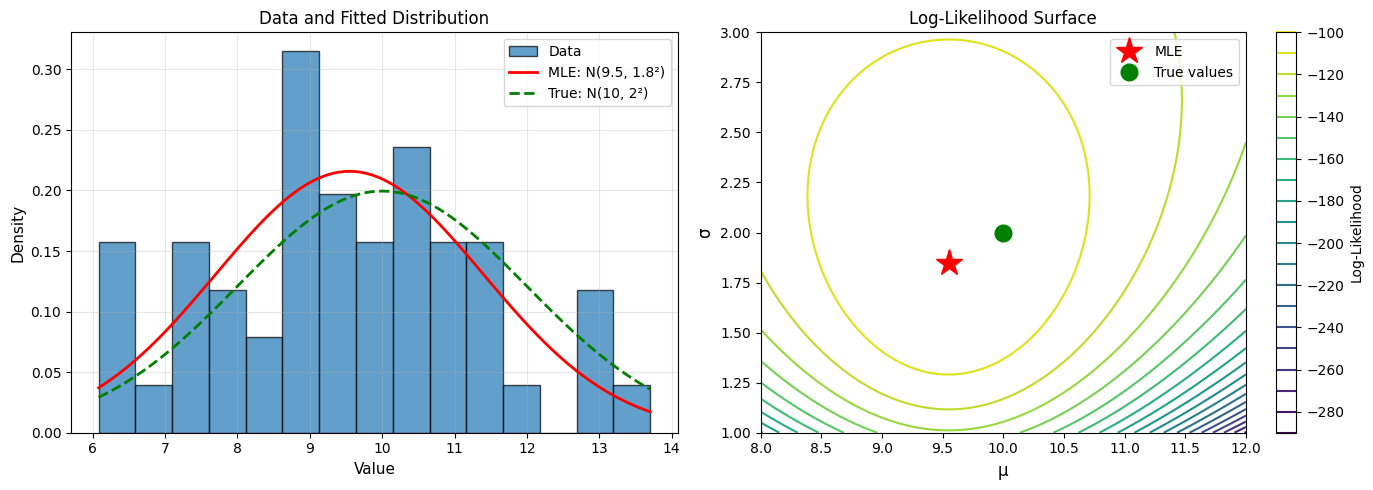

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

np.random.seed(42)

# Generate data
true_mu = 10
true_sigma = 2
n = 50
data = np.random.normal(true_mu, true_sigma, n)

print("Normal Distribution MLE")
print("="*70)
print(f"True μ: {true_mu}, True σ: {true_sigma}")
print(f"Sample size: {n}")
print()

# Analytical MLE
mu_mle = np.mean(data)
sigma2_mle = np.mean((data - mu_mle)**2)
sigma_mle = np.sqrt(sigma2_mle)

print("Analytical MLE:")
print(f"  μ̂ = {mu_mle:.3f}")
print(f"  σ̂ = {sigma_mle:.3f}")
print()

# Numerical MLE (for illustration)
def neg_log_likelihood_normal(params, data):
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    n = len(data)
    return n/2 * np.log(2*np.pi) + n/2 * np.log(sigma**2) + \
           np.sum((data - mu)**2) / (2 * sigma**2)

# Optimize
initial_guess = [0, 1]
result = minimize(neg_log_likelihood_normal, initial_guess, args=(data,),
                  method='Nelder-Mead')

mu_mle_num, sigma_mle_num = result.x

print("Numerical MLE (verification):")
print(f"  μ̂ = {mu_mle_num:.3f}")
print(f"  σ̂ = {sigma_mle_num:.3f}")
print()

# Compare with true values
print("Comparison with true values:")
print(f"  μ: error = {abs(mu_mle - true_mu):.3f}")
print(f"  σ: error = {abs(sigma_mle - true_sigma):.3f}")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Data histogram with fitted distribution
ax1.hist(data, bins=15, density=True, alpha=0.7, edgecolor='black',
         label='Data')
x = np.linspace(data.min(), data.max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu_mle, sigma_mle), 'r-', linewidth=2,
         label=f'MLE: N({mu_mle:.1f}, {sigma_mle:.1f}²)')
ax1.plot(x, stats.norm.pdf(x, true_mu, true_sigma), 'g--', linewidth=2,
         label=f'True: N({true_mu}, {true_sigma}²)')
ax1.set_xlabel('Value', fontsize=11)
ax1.set_ylabel('Density', fontsize=11)
ax1.set_title('Data and Fitted Distribution', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# Likelihood surface (contour plot)
mu_range = np.linspace(8, 12, 100)
sigma_range = np.linspace(1, 3, 100)
MU, SIGMA = np.meshgrid(mu_range, sigma_range)
LL = np.zeros_like(MU)

for i in range(len(mu_range)):
    for j in range(len(sigma_range)):
        LL[j, i] = -neg_log_likelihood_normal([MU[j,i], SIGMA[j,i]], data)

contour = ax2.contour(MU, SIGMA, LL, levels=20, cmap='viridis')
ax2.plot(mu_mle, sigma_mle, 'r*', markersize=20, label='MLE')
ax2.plot(true_mu, true_sigma, 'go', markersize=12, label='True values')
ax2.set_xlabel('μ', fontsize=12)
ax2.set_ylabel('σ', fontsize=12)
ax2.set_title('Log-Likelihood Surface', fontsize=12)
ax2.legend(fontsize=10)
plt.colorbar(contour, ax=ax2, label='Log-Likelihood')

plt.tight_layout()
plt.savefig('normal_mle.png', dpi=150, bbox_inches='tight')
plt.show()

## Example 3: Poisson Distribution

### Problem

Count data \(x_1, \ldots, x_n \sim \text{Poisson}(\lambda)\). Estimate λ.

### Solution

**PMF**: \(P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}\)

**Log-likelihood**:
$$
\ell(\lambda) = \sum_{i=1}^{n}\left[x_i\log\lambda - \lambda - \log(x_i!)\right]
$$

**Derivative**:
$$
\frac{d\ell}{d\lambda} = \frac{1}{\lambda}\sum_{i=1}^{n}x_i - n = 0
$$

**MLE**:
$$
\hat{\lambda}_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^{n}x_i = \bar{x}
$$

The MLE is the sample mean!

### Python Implementation

Poisson MLE Example
True λ: 5
Sample: 100 observations
Sample mean: 4.940
Sample variance: 5.673

MLE estimate: λ̂ = 4.940



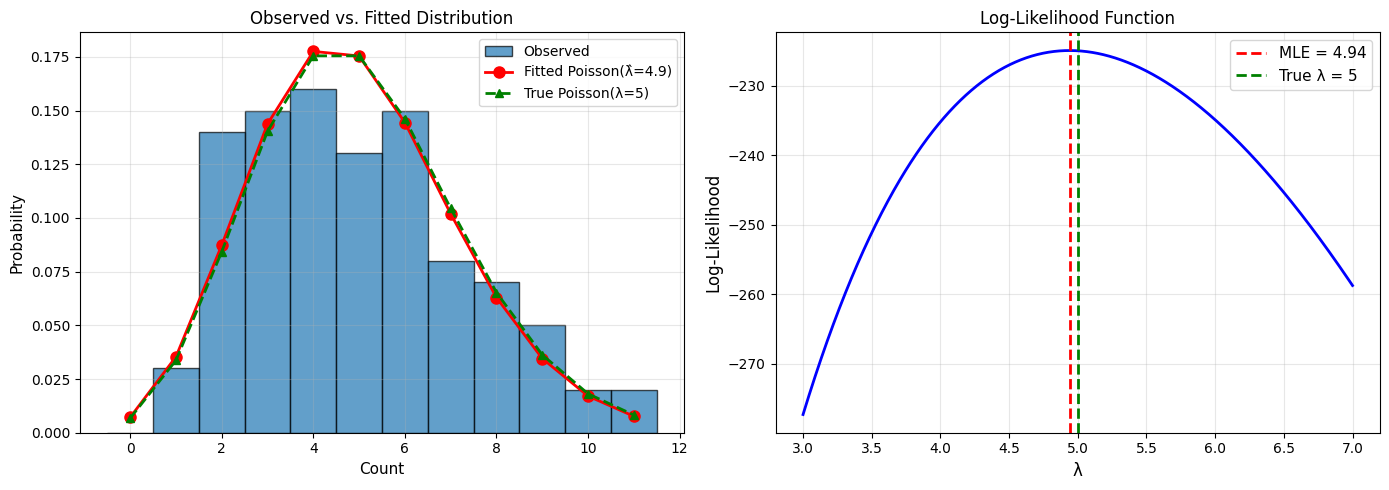

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gammaln

np.random.seed(42)

# Generate Poisson data (e.g., number of customers per hour)
true_lambda = 5
n = 100
counts = np.random.poisson(true_lambda, n)

print("Poisson MLE Example")
print("="*70)
print(f"True λ: {true_lambda}")
print(f"Sample: {n} observations")
print(f"Sample mean: {np.mean(counts):.3f}")
print(f"Sample variance: {np.var(counts, ddof=1):.3f}")
print()

# MLE
lambda_mle = np.mean(counts)
print(f"MLE estimate: λ̂ = {lambda_mle:.3f}")
print()
# Log-likelihood function
def log_likelihood_poisson(lam, data):
    if lam <= 0:
        return -np.inf
    return np.sum(data * np.log(lam) - lam - gammaln(data + 1))
    return np.sum(data * np.log(lam) - lam - np.log(stats.factorial(data)))

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Data distribution
max_count = counts.max()
ax1.hist(counts, bins=range(max_count+2), density=True, alpha=0.7,
         edgecolor='black', align='left', label='Observed')
x = np.arange(0, max_count+1)
ax1.plot(x, stats.poisson.pmf(x, lambda_mle), 'ro-', linewidth=2,
         markersize=8, label=f'Fitted Poisson(λ̂={lambda_mle:.1f})')
ax1.plot(x, stats.poisson.pmf(x, true_lambda), 'g^--', linewidth=2,
         markersize=6, label=f'True Poisson(λ={true_lambda})')
ax1.set_xlabel('Count', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Observed vs. Fitted Distribution', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# Likelihood function
lambda_values = np.linspace(3, 7, 1000)
log_likes = [log_likelihood_poisson(lam, counts) for lam in lambda_values]

ax2.plot(lambda_values, log_likes, 'b-', linewidth=2)
ax2.axvline(lambda_mle, color='red', linestyle='--', linewidth=2,
            label=f'MLE = {lambda_mle:.2f}')
ax2.axvline(true_lambda, color='green', linestyle='--', linewidth=2,
            label=f'True λ = {true_lambda}')
ax2.set_xlabel('λ', fontsize=12)
ax2.set_ylabel('Log-Likelihood', fontsize=12)
ax2.set_title('Log-Likelihood Function', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('poisson_mle.png', dpi=150, bbox_inches='tight')
plt.show()

## Properties of MLEs

### 1. Consistency

As \(n \to \infty\), \(\hat{\theta}_{\text{MLE}} \to \theta_{\text{true}}\) (in probability)

### 2. Asymptotic Normality

For large n:
$$
\hat{\theta}_{\text{MLE}} \sim N\left(\theta, \frac{1}{nI(\theta)}\right)
$$

where \(I(\theta)\) is the **Fisher Information**.

### 3. Efficiency

MLEs achieve the **Cramér-Rao lower bound** - no unbiased estimator has smaller variance.

### 4. Invariance

If \(\hat{\theta}\) is the MLE of θ, then \(g(\hat{\theta})\) is the MLE of \(g(\theta)\) for any function g.

## Confidence Intervals from MLE

### Using Asymptotic Normality

For large n:
$$
\hat{\theta} \pm z_{\alpha/2} \cdot \text{SE}(\hat{\theta})
$$

where SE is estimated from Fisher Information or observed information.

### Profile Likelihood

More accurate for small samples:
$$
\{\theta: 2(\ell(\hat{\theta}) - \ell(\theta)) \leq \chi^2_{1,\alpha}\}
$$

## Numerical MLE

For complex models without closed-form solutions:

In [6]:
from scipy.optimize import minimize
import numpy as np

def neg_log_likelihood(params, data):
    # params = [mu, sigma], with sigma > 0
    mu, sigma = params
    if sigma <= 0 or not np.isfinite(sigma):
        return np.inf
    n = len(data)
    return n/2 * np.log(2*np.pi) + n/2 * np.log(sigma**2) + np.sum((data - mu)**2) / (2 * sigma**2)

# Use existing estimates from the notebook as starting values
initial_guess = [mu_mle, sigma_mle]

result = minimize(neg_log_likelihood, initial_guess, args=(data,), method='BFGS')

mle_params = result.x
print(f"MLE: {mle_params}")
print(f"Negative log-likelihood: {result.fun}")
print(f"Success: {result.success}")

MLE: [9.54905219 1.84856988]
Negative log-likelihood: 101.66754166036912
Success: True


## Summary

### MLE Recipe

1. **Write likelihood**: \(L(\theta) = \prod f(x_i \mid \theta)\)
2. **Take log**: \(\ell(\theta) = \sum \log f(x_i \mid \theta)\)
3. **Differentiate**: \(\frac{d\ell}{d\theta} = 0\)
4. **Solve**: Find \(\hat{\theta}_{\text{MLE}}\)
5. **Verify**: Check second derivative or use numerical optimization

### Common MLEs

| Distribution | Parameter | MLE |
|-------------|-----------|-----|
| Bernoulli(p) | p | k/n (sample proportion) |
| Normal(μ, σ²) | μ | \(\bar{x}\) (sample mean) |
| Normal(μ, σ²) | σ² | \(\frac{1}{n}\sum(x_i-\bar{x})^2\) |
| Poisson(λ) | λ | \(\bar{x}\) (sample mean) |
| Exponential(λ) | λ | \(1/\bar{x}\) |

### Advantages of MLE

✅ Optimal properties (consistency, efficiency)  
✅ General method (works for any model)  
✅ No prior distribution needed  
✅ Widely used and understood  

### Limitations

❌ Can be unstable with small samples  
❌ May not exist or be unique  
❌ Doesn't incorporate prior knowledge  
❌ Requires optimization for complex models